<a href="https://colab.research.google.com/github/nickplas/Intro_to_ML_24-25/blob/main/notebooks/Lab-0.1.IntroPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas

_pandas_ is an open source Python library for data analysis.

## Data structures

Pandas introduces two new data structures: **Series** and **Data frame**.

### Series

A Series in a one-dimensional object (similar to an array, list, or column in a table). A labeled index is assigned to each item in the Series (the default are 0-N indeces, being N the length of the Series minus one).

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# create a series with a list
s = pd.Series([7, 'Hello world', 42.26])
print("Series with default index: ")
print(s)

Series with default index: 
0              7
1    Hello world
2          42.26
dtype: object


In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
# create a series with a user-defined index
series_with_index = pd.Series([2, True, 'Hey'], index=['A', 'B', 'C'])
print("\nSeries with user-defined index: ")
print(series_with_index)


Series with user-defined index: 
A       2
B    True
C     Hey
dtype: object


In [ ]:
# create a series from dictionary
# in this case the index is made by the keys of the dictionary
d = {'One':1, 'Two':2, 'Three':3}
series_from_dict = pd.Series(d)
print("\nSeries from dictionary:")
print(series_from_dict)


Series from dictionary:
One      1
Two      2
Three    3
dtype: int64


In [ ]:
# indexing series
dd = {'Chicago':1000, 'New York':1300, 'Portland':900, 'San Francisco':1100,
     'Austin':450, 'Boston':None}
cities = pd.Series(dd)
print("\nCities Series:")
print(cities)


Cities Series:
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
Austin            450.0
Boston              NaN
dtype: float64


In [ ]:
# use the index to select specific items
c = cities[['New York', 'San Francisco', 'Boston']]
c

New York         1300.0
San Francisco    1100.0
Boston              NaN
dtype: float64

In [ ]:
# use boolean indexing for selection
cc = cities[cities<1000]
cc

Portland    900.0
Austin      450.0
dtype: float64

In [ ]:
# change the value in a Series
cities['Austin'] = 500
cities

Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
Austin            500.0
Boston              NaN
dtype: float64

In [ ]:
# add two series together
# returns a union of the two series with the addition occurring on the shared index values
# NaN (Not a Number) on the others
s1 = pd.Series([1, 2, 3], index=['A', 'B', 'C'])
s2 = pd.Series([4, 5, 6], index=['A', 'D', 'C'])

print("\ns1: ")
print(s1)
print("\ns2: ")
print(s2)
print("\ns1 + s2: ")
ss = s1 + s2
print(ss)


s1: 
A    1
B    2
C    3
dtype: int64

s2: 
A    4
D    5
C    6
dtype: int64

s1 + s2: 
A    5.0
B    NaN
C    9.0
D    NaN
dtype: float64


In [ ]:
# null checking
# using notnull: returns a boolean series indicating which values aren't null
not_null = cities.notnull()
print("\nNon-null elements in cities (notnull):")
print(not_null)

# using isnull: returns a boolean series indicating which values are null
is_null = cities.isnull()
is_null_cities = cities[is_null]
print("\nNull elements in cities (isnull): ")
print(is_null_cities)


Non-null elements in cities (notnull):
Chicago           True
New York          True
Portland          True
San Francisco     True
Austin            True
Boston           False
dtype: bool

Null elements in cities (isnull): 
Boston   NaN
dtype: float64


### DataFrame

A DataFrame is a tabular data structure comprised of rows and columns. It can be thought of as a group of Series objects that share an index (the columns' name).

#### Reading data

In order to create manually a DataFrame we can pass a dictionary of lists to the DataFrame constructor:

In [ ]:
data = {'letters':['A', 'B', 'C', 'D'],
       'numbers':[1, 2, 3, 4],
       'spelling': ['One', 'Two', 'Three', 'Four']}
letters_numbers = pd.DataFrame(data, columns=['letters', 'numbers', 'spelling'])
letters_numbers

,letters,numbers,spelling
0,A,1,One
1,B,2,Two
2,C,3,Three
3,D,4,Four


More often we have a dataset that we want to read into a DataFrame.

The most common formats are *CSV* and *excel*, they are read using the functions `read_csv` and `read_excel` respectively.

In [ ]:
FFILE = './Dry_Bean_Dataset.xlsx'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx"

Either the file is missing or not readable, download it
--2023-09-11 13:45:44--  https://raw.github.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx [following]
--2023-09-11 13:45:44--  https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/main/Lab5/Dry_Bean_Dataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3043341 (2.9M) [application/octet-stream]
Saving to: ‘Dry_Bean_Dataset.xlsx’

Dry_Bean_

In [ ]:
# import excel dataset
thanks = pd.read_excel('./Dry_Bean_Dataset.xlsx')
# head(n) shows the first n rows (default is n=5)
thanks.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
# import csv dataset
path_csv = 'https://raw.githubusercontent.com/LucaPennella/Intro_ML_23-24/main/data/ign.csv'
reviews = pd.read_csv(path_csv)
reviews.head(3)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12


#### Indexing

Pandas supports several methods for indexing data in a table:

* `iloc` (integer based indexing): refers to rows and columns by their position, expressed as an integer starting from zero;
* `loc` (label based indexing): uses row and column name;
* Boolean indexing: uses boolean masks. Row names are stored in the field `index` of a data frame, columns names are stored in the field `columns`.

We can observe that the csv-imported dataset has a discrepancy: the columns are shifted one position to the right with respect to the labels. We can fix this problem with the `iloc` method:

In [ ]:
col = reviews.columns # columns' names
reviews = reviews.iloc[:,1:] # ignoring the column 0
reviews.head() # problem fixed!

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [ ]:
# select a subset of rows and columns of the dataframe
reviews.iloc[0:10, 0:2] # first ten rows, first two columns

,score_phrase,title
0,Amazing,LittleBigPlanet PS Vita
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...
2,Great,Splice: Tree of Life
3,Great,NHL 13
4,Great,NHL 13
5,Good,Total War Battles: Shogun
6,Awful,Double Dragon: Neon
7,Amazing,Guild Wars 2
8,Awful,Double Dragon: Neon
9,Good,Total War Battles: Shogun


In [ ]:
# select a subset of rows of the dataframe
restricted_reviews = reviews.loc[10:20] # rows from ten to twenty
restricted_reviews

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
12,Good,Wild Blood,/games/wild-blood/iphone-139363,iPhone,7.0,NaN,N,2012,9,10
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7
15,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/mac-2001...,Macintosh,6.5,Adventure,N,2012,9,6
16,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/pc-137135,PC,6.5,Adventure,N,2012,9,6
17,Great,Avengers Initiative,/games/avengers-initiative/iphone-141579,iPhone,8.0,Action,N,2012,9,5
18,Mediocre,Way of the Samurai 4,/games/way-of-the-samurai-4/ps3-23516,PlayStation 3,5.5,"Action, Adventure",N,2012,9,3
19,Good,JoJo's Bizarre Adventure HD,/games/jojos-bizarre-adventure/xbox-360-137717,Xbox 360,7.0,Fighting,N,2012,9,3


In [ ]:
# select a subset of rows and columns using columns' names
reviews.loc[0:10, ["title", "score"]]

,title,score
0,LittleBigPlanet PS Vita,9.0
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,9.0
2,Splice: Tree of Life,8.5
3,NHL 13,8.5
4,NHL 13,8.5
5,Total War Battles: Shogun,7.0
6,Double Dragon: Neon,3.0
7,Guild Wars 2,9.0
8,Double Dragon: Neon,3.0
9,Total War Battles: Shogun,7.0


In [ ]:
# select a subset of columns by their names keeping all rows
reviews[["title", "score"]]

,title,score
0,LittleBigPlanet PS Vita,9.0
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,9.0
2,Splice: Tree of Life,8.5
3,NHL 13,8.5
4,NHL 13,8.5
...,...,...
18620,Tokyo Mirage Sessions #FE,7.6
18621,LEGO Star Wars: The Force Awakens,9.0
18622,Star Ocean: Integrity and Faithlessness,5.8
18623,Inside,10.0


In [ ]:
# indexing using boolean mask
mask = reviews["score"] >= 9.5
mask # series of booleans

0        False
1        False
2        False
3        False
4        False
         ...  
18620    False
18621    False
18622    False
18623     True
18624     True
Name: score, Length: 18625, dtype: bool

In [ ]:
# retrieve title of the games having a score >=9.5
cool_games = reviews[mask]["title"]
print("Fraction of cool games: ")
# len returns the number of rows
print(len(cool_games)/len(reviews["title"]))
cool_games

Fraction of cool games: 
0.020671140939597314


33                   Pokemon White Version 2
35                   Pokemon Black Version 2
52       The World Ends with You: Solo Remix
54       The World Ends with You: Solo Remix
135        Zero Escape: Virtue's Last Reward
                        ...                 
18511                                 Inside
18562                Odin Sphere Leifthrasir
18563                Odin Sphere Leifthrasir
18623                                 Inside
18624                                 Inside
Name: title, Length: 385, dtype: object

The following are some functions that can be used to get information about a DataFrame and do some maths with numeric columns:

In [ ]:
# info about each column
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   score_phrase    18625 non-null  object 
 1   title           18625 non-null  object 
 2   url             18625 non-null  object 
 3   platform        18625 non-null  object 
 4   score           18625 non-null  float64
 5   genre           18589 non-null  object 
 6   editors_choice  18625 non-null  object 
 7   release_year    18625 non-null  int64  
 8   release_month   18625 non-null  int64  
 9   release_day     18625 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1.4+ MB


In [ ]:
# statistical infos about the column score
reviews["score"].describe()

count    18625.000000
mean         6.950459
std          1.711736
min          0.500000
25%          6.000000
50%          7.300000
75%          8.200000
max         10.000000
Name: score, dtype: float64

In [ ]:
# mean of each numeric column
reviews.mean()

<ipython-input-30-168b17198ea1>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  reviews.mean()


score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

In [ ]:
# median of each numeric column
reviews.median()

<ipython-input-31-427f54dbf4db>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  reviews.median()


score               7.3
release_year     2007.0
release_month       8.0
release_day        16.0
dtype: float64

In [ ]:
# arithmetic manipulation of the score column
reviews["score"]/2*3

0        13.50
1        13.50
2        12.75
3        12.75
4        12.75
         ...  
18620    11.40
18621    13.50
18622     8.70
18623    15.00
18624    15.00
Name: score, Length: 18625, dtype: float64

#### Summarising data

In [ ]:
# unique: returns unique values of series object
reviews["platform"].unique()

array(['PlayStation Vita', 'iPad', 'Xbox 360', 'PlayStation 3',
       'Macintosh', 'PC', 'iPhone', 'Nintendo DS', 'Nintendo 3DS',
       'Android', 'Wii', 'PlayStation 4', 'Wii U', 'Linux',
       'PlayStation Portable', 'PlayStation', 'Nintendo 64', 'Saturn',
       'Lynx', 'Game Boy', 'Game Boy Color', 'NeoGeo Pocket Color',
       'Game.Com', 'Dreamcast', 'Dreamcast VMU', 'WonderSwan', 'Arcade',
       'Nintendo 64DD', 'PlayStation 2', 'WonderSwan Color',
       'Game Boy Advance', 'Xbox', 'GameCube', 'DVD / HD Video Game',
       'Wireless', 'Pocket PC', 'N-Gage', 'NES', 'iPod', 'Genesis',
       'TurboGrafx-16', 'Super NES', 'NeoGeo', 'Master System',
       'Atari 5200', 'TurboGrafx-CD', 'Atari 2600', 'Sega 32X', 'Vectrex',
       'Commodore 64/128', 'Sega CD', 'Nintendo DSi', 'Windows Phone',
       'Web Games', 'Xbox One', 'Windows Surface', 'Ouya',
       'New Nintendo 3DS', 'SteamOS'], dtype=object)

In [ ]:
# value_counts: returns a series containing counts of unique values
reviews["release_year"].value_counts(dropna=False)

2008    1915
2009    1687
2007    1610
2010    1363
2006    1208
2005    1088
2011    1073
2000    1045
2004     997
2003     969
2002     936
1999     775
2012     753
2013     696
2001     688
2014     537
2015     365
1998     339
2016     226
1997     205
1996     149
1970       1
Name: release_year, dtype: int64

#### Grouping data

Grouping data allows to aggregate data with respect to the values of one column, typically a category, even hierarchically.

It is useful especially in data analysis problems, in which one often breaks the problem apart into manageble pieces, and then put everything back together again.

The method `groupby` returns a collection of dataframes, which can be iterated on.

In [ ]:
grouped = reviews.groupby('genre')
grouped.size()

genre
Action                   3797
Action, Adventure         765
Action, Compilation        89
Action, Editor              1
Action, Platformer          3
                         ... 
Strategy, Simulation        1
Trivia                    119
Virtual Pet                82
Wrestling                 134
Wrestling, Simulation       1
Length: 112, dtype: int64

In [ ]:
# iterability/dataframe iteration
for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

Action
(3797, 10)
<class 'pandas.core.frame.DataFrame'>
Action, Adventure
(765, 10)
<class 'pandas.core.frame.DataFrame'>
Action, Compilation
(89, 10)
<class 'pandas.core.frame.DataFrame'>
Action, Editor
(1, 10)
<class 'pandas.core.frame.DataFrame'>
Action, Platformer
(3, 10)
<class 'pandas.core.frame.DataFrame'>
Action, Puzzle
(1, 10)
<class 'pandas.core.frame.DataFrame'>
Action, RPG
(330, 10)
<class 'pandas.core.frame.DataFrame'>
Action, Simulation
(32, 10)
<class 'pandas.core.frame.DataFrame'>
Action, Strategy
(1, 10)
<class 'pandas.core.frame.DataFrame'>
Adult, Card
(2, 10)
<class 'pandas.core.frame.DataFrame'>
Adventure
(1175, 10)
<class 'pandas.core.frame.DataFrame'>
Adventure, Adult
(1, 10)
<class 'pandas.core.frame.DataFrame'>
Adventure, Adventure
(5, 10)
<class 'pandas.core.frame.DataFrame'>
Adventure, Compilation
(11, 10)
<class 'pandas.core.frame.DataFrame'>
Adventure, Episodic
(4, 10)
<class 'pandas.core.frame.DataFrame'>
Adventure, Platformer
(1, 10)
<class 'pandas.core.fr

In [ ]:
reviews['score_phrase']

0            Amazing
1            Amazing
2              Great
3              Great
4              Great
            ...     
18620           Good
18621        Amazing
18622       Mediocre
18623    Masterpiece
18624    Masterpiece
Name: score_phrase, Length: 18625, dtype: object

In [ ]:
# another example of grouping
reviews.groupby('score_phrase')['score'].mean()

score_phrase
Amazing         9.176663
Awful           3.290211
Bad             4.331600
Disaster        0.666667
Good            7.369099
Great           8.316510
Masterpiece    10.000000
Mediocre        5.318530
Okay            6.366553
Painful         2.267941
Unbearable      1.290278
Name: score, dtype: float64

#### Applying functions to Series and DataFrames

With the method `apply` of the Series object we can apply a (python/numpy/user-defined/lambda) function to each element of the Series.

In [ ]:
reviews['editors_choice']

0        Y
1        Y
2        N
3        N
4        N
        ..
18620    N
18621    Y
18622    N
18623    Y
18624    Y
Name: editors_choice, Length: 18625, dtype: object

In [ ]:
# transform (encode) the column gender to a numeric one
def editor_code(gstr):
    if(pd.isnull(gstr)):
        return gstr
    elif gstr == "Y":
        return 1
    else: # gstr == "N"
        return 0

# apply function
reviews['editors_choice'] = reviews['editors_choice'].apply(editor_code)
# check the result
reviews['editors_choice'].value_counts(dropna=False)

0    15108
1     3517
Name: editors_choice, dtype: int64

#### Aggregating data

Numerical columns in grouped structures can be aggregated, in order for example to visualize their mean, sum, etc.. by calling the `agg` function.

In [ ]:
grouped.agg(np.mean)

<ipython-input-43-2f02a87b5c6c>:1: FutureWarning: The operation <function mean at 0x7b113b698280> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  grouped.agg(np.mean)


,score,editors_choice,release_year,release_month,release_day
genre,,,,,
Action,6.626679,0.127206,2006.241243,6.995259,15.841454
"Action, Adventure",7.371895,0.266667,2006.935948,7.338562,16.071895
"Action, Compilation",7.029213,0.123596,2006.561798,7.820225,15.775281
"Action, Editor",7.500000,0.000000,2007.000000,5.000000,30.000000
"Action, Platformer",6.066667,0.000000,2010.333333,6.333333,15.333333
...,...,...,...,...,...
"Strategy, Simulation",8.100000,0.000000,2015.000000,2.000000,26.000000
Trivia,6.205042,0.084034,2006.865546,7.781513,16.302521
Virtual Pet,6.026829,0.121951,2007.439024,6.646341,15.146341


In [ ]:
# we can also pass a list of aggregating functions
gr_genre = grouped["score"].agg([np.mean, np.std])
gr_genre

,mean,std
genre,,
Action,6.626679,1.690888
"Action, Adventure",7.371895,1.585589
"Action, Compilation",7.029213,1.425355
"Action, Editor",7.500000,NaN
"Action, Platformer",6.066667,0.808290
...,...,...
"Strategy, Simulation",8.100000,NaN
Trivia,6.205042,1.762118
Virtual Pet,6.026829,1.837473


#### Plotting data

The `plot` method of `DataFrame` is the way in which data are plotted in Pandas.

The option `kind` allows the selection of the plot type (e.g. hist, bar).

<Axes: >

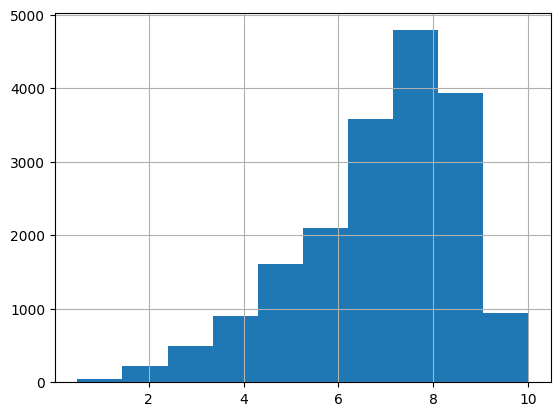

In [ ]:
# histogram
#reviews["score"].plot(kind='hist');
# equivalent:
reviews["score"].hist()

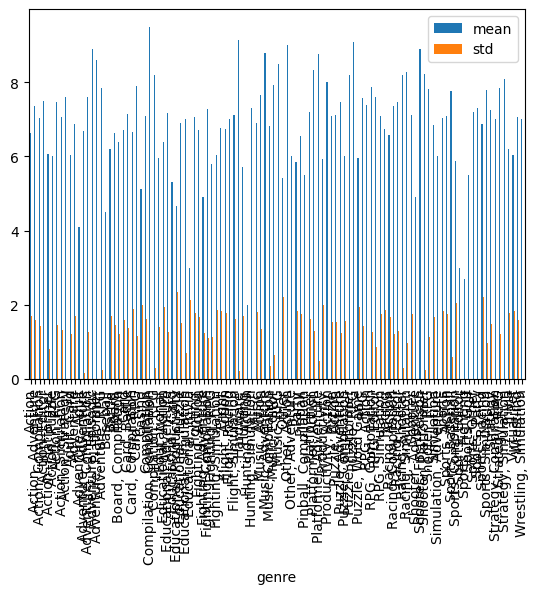

In [ ]:
# bar plot
gr_genre.plot(kind="bar");

**Documentation**



You can find all the documentation on Pandas and its functions at the following link: [pandas documentation](https://pandas.pydata.org/docs/index.html)

**Further sources**



*   [What is Pandas? Why and How to Use Pandas in Python](https://www.youtube.com/watch?v=dcqPhpY7tWk)

